# Tahir's Car Price Prediction Model

#  1) Cleaning the data

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [2]:
initial_data = pd.read_csv("1.04. Real-life example.csv")   # Reading the csv file
initial_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [3]:
initial_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
initial_data.describe()    # This will give only numerical variable/attribute

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [5]:
initial_data.describe(include="all")     # This will give numerical as well as categorical variable/attribute

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [6]:
original_data = initial_data.drop("Model" , axis=1)    # Drop "Model" attribute from database . axis=1 indictaes column
original_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


In [7]:
original_data.isnull()     # The null values appears as True

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [8]:
original_data.isnull().sum()    # Sum of null values in respective variable/attirbute

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [9]:
original_data_without_nullValues = original_data.dropna(axis=0)   # axis=0 indictaes rows . Drop all null values from rows
original_data_without_nullValues

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


In [10]:
original_data_without_nullValues.isnull().sum()   # Null values are successfully removed.

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [11]:
original_data_without_nullValues.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [12]:
original_data_without_nullValues.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


<ipython-input-13-5a65bebd10c5>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data_without_nullValues["Price"])


<Axes: xlabel='Price', ylabel='Density'>

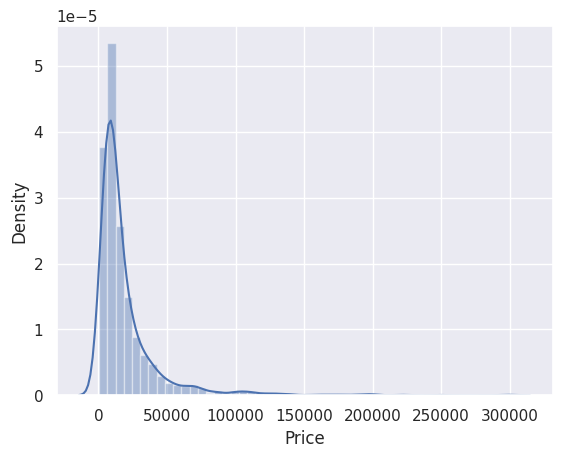

In [13]:
# Display the probability distribution function (PDF) pf a variable
# The PDF will show us how that variable is distributed
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature


sns.distplot(original_data_without_nullValues["Price"])

<ipython-input-14-6448d493d61d>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1["Price"])


<Axes: xlabel='Price', ylabel='Density'>

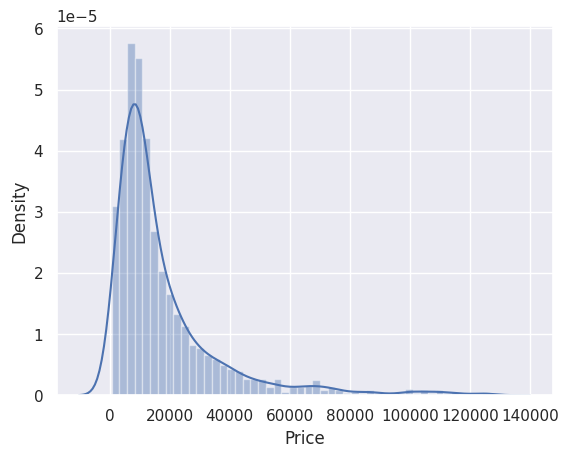

In [14]:

# Obviously there are some outliers present

# Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price

# Outliers are a great issue for OLS, thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers




# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = original_data_without_nullValues["Price"].quantile(0.99)

# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = original_data_without_nullValues[original_data_without_nullValues["Price"]<q]


#  data_1 = original_data_without_nullValues["Price"]<q     ---> Error
sns.distplot(data_1["Price"])

In [15]:
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe()       # We can see the difference between mean and maximum value is minimised .

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


In [16]:
data_1_q = original_data_without_nullValues["Price"]<q      # It is just for practice
data_1_q.describe()

count     4025
unique       2
top       True
freq      3984
Name: Price, dtype: object

<ipython-input-17-53f8d5e290b3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1["Mileage"] , bins=2)


<Axes: xlabel='Mileage', ylabel='Density'>

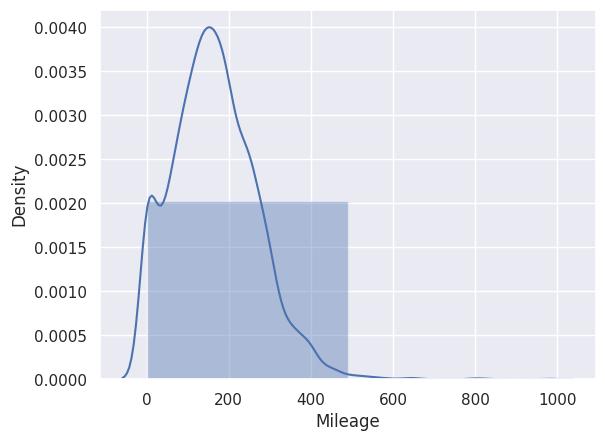

In [17]:
sns.distplot(data_1["Mileage"] , bins=2)

<ipython-input-18-6db95590e007>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1["Mileage"] )


<Axes: xlabel='Mileage', ylabel='Density'>

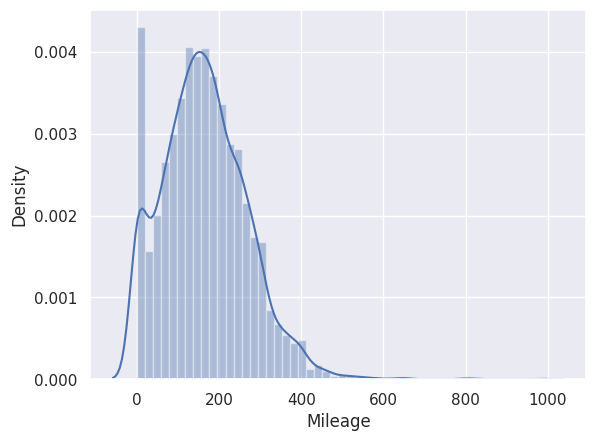

In [18]:
sns.distplot(data_1["Mileage"] )

<ipython-input-19-15d1b93adc8f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2["Mileage"])


<Axes: xlabel='Mileage', ylabel='Density'>

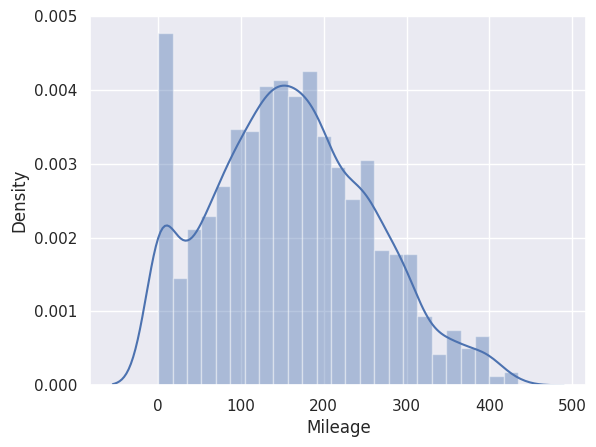

In [19]:
q = data_1["Mileage"].quantile(0.99)
data_2 = data_1[data_1["Mileage"]<q]
sns.distplot(data_2["Mileage"])

<ipython-input-20-fd09fae7b1fe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2["EngineV"])


<Axes: xlabel='EngineV', ylabel='Density'>

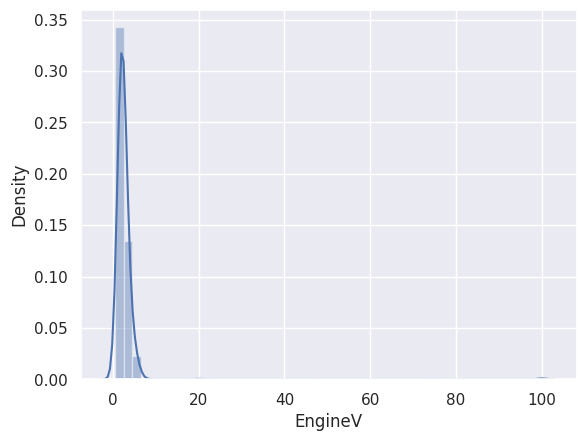

In [20]:
sns.distplot(data_2["EngineV"])

<ipython-input-21-ed46181f030d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3["EngineV"])


<Axes: xlabel='EngineV', ylabel='Density'>

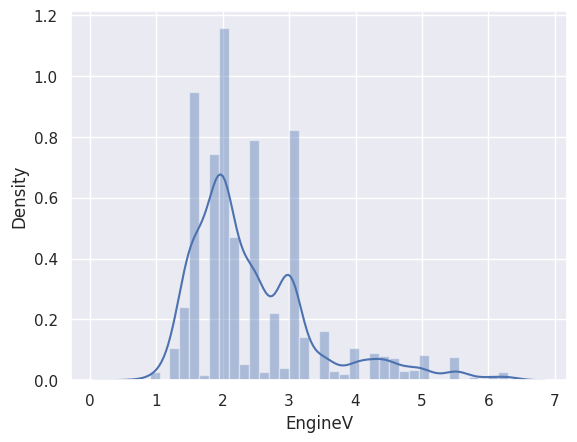

In [21]:
# A simple Google search can indicate the natural domain of this variable
# Car engine volumes are usually (always?) below 6.5l
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider

data_3 = data_2[data_2["EngineV"]<6.5]
sns.distplot(data_3["EngineV"])

<ipython-input-22-21d003e42bc0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3["Year"])


<Axes: xlabel='Year', ylabel='Density'>

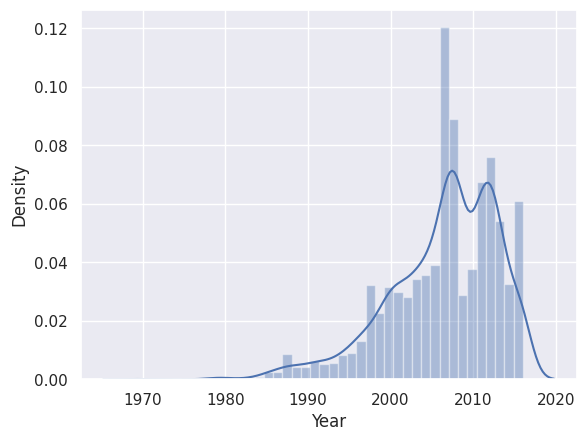

In [22]:
sns.distplot(data_3["Year"])

<ipython-input-23-603e0c8414a5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4["Year"])


<Axes: xlabel='Year', ylabel='Density'>

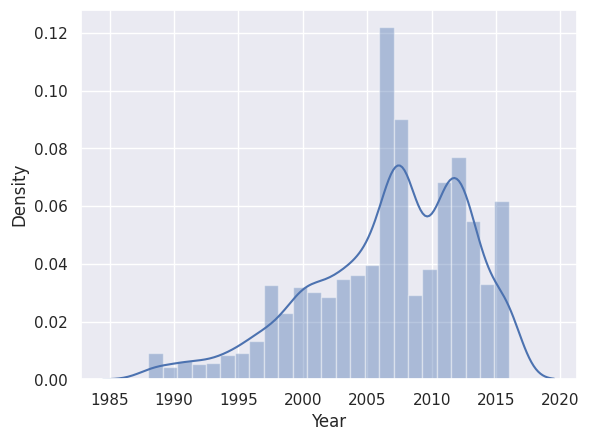

In [23]:
q = data_3["Year"].quantile(0.01)      # 1% as there is left outlier
data_4 = data_3[data_3["Year"]>q]
sns.distplot(data_4["Year"])

Final cleaned data

In [24]:
cleaned_data = data_4.reset_index(drop=True)

Check for the changes in  mean , max , min

In [25]:
cleaned_data.describe()

,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853
std,19085.855165,95.633291,0.949366,6.103870
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


In [26]:
original_data_without_nullValues.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


# 2) Checking the OLS assumptions

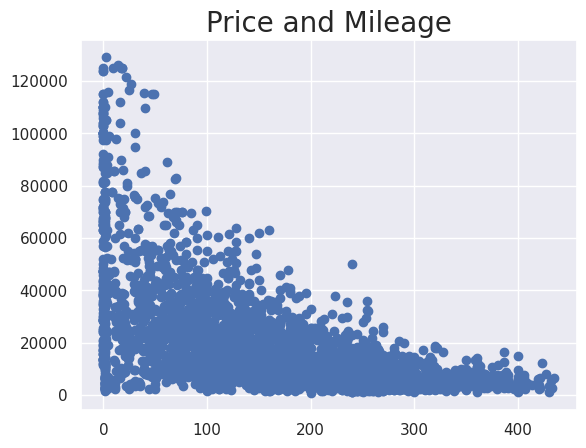

In [27]:


# Plotting everything seperately

#plt.scatter(x_axis,y_axis)
plt.scatter(cleaned_data["Mileage"],cleaned_data["Price"])
plt.title("Price and Mileage" , fontsize=20)
plt.show()


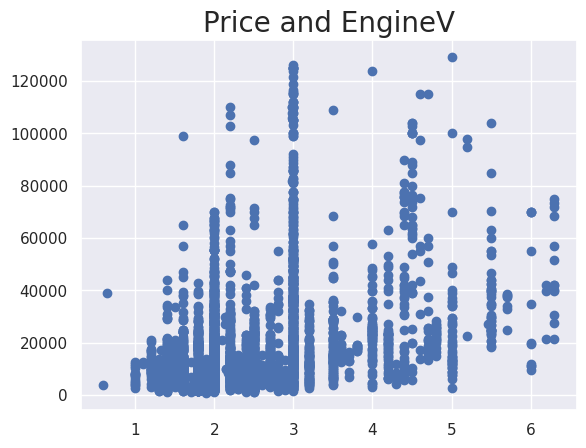

In [28]:
plt.scatter(cleaned_data["EngineV"],cleaned_data["Price"])
plt.title("Price and EngineV" , fontsize=20)
plt.show()

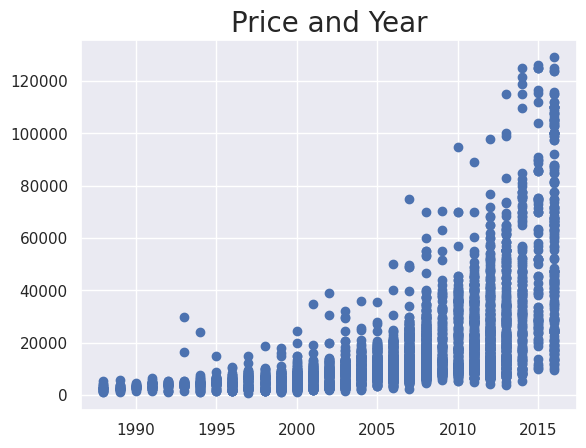

In [29]:
plt.scatter(cleaned_data["Year"],cleaned_data["Price"])
plt.title("Price and Year" , fontsize=20)
plt.show()

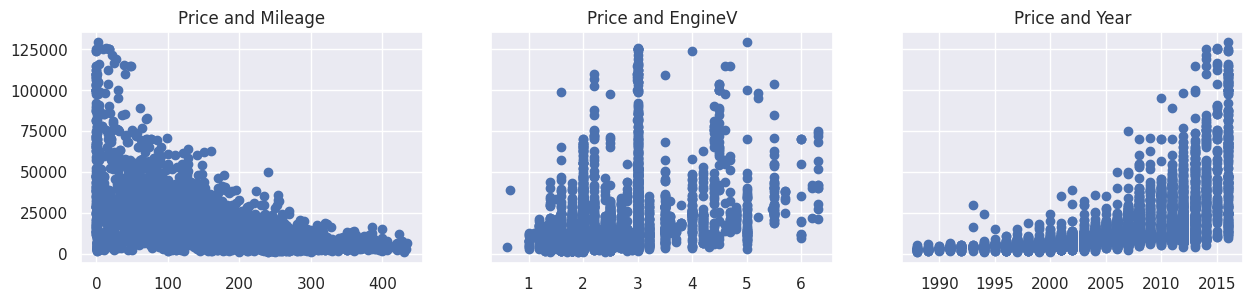

In [30]:


# We dont have much knowledge about this methods
# It is used to plot side  by side (so we can compare them).
# f ---> figure
# Syntax = f , ax = plt.subplots()  ,  (1,3) -> 3 Represents the number of figure , 1 Represents the number of line in which the number of figure can be drawn


f, (Tahir, Aadil , Razzak) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y


Tahir.scatter(cleaned_data['Mileage'],cleaned_data['Price'])
Tahir.set_title('Price and Mileage')

Aadil.scatter(cleaned_data['EngineV'],cleaned_data['Price'])
Aadil.set_title('Price and EngineV')

Razzak.scatter(cleaned_data['Year'],cleaned_data['Price'])
Razzak.set_title('Price and Year')


plt.show()

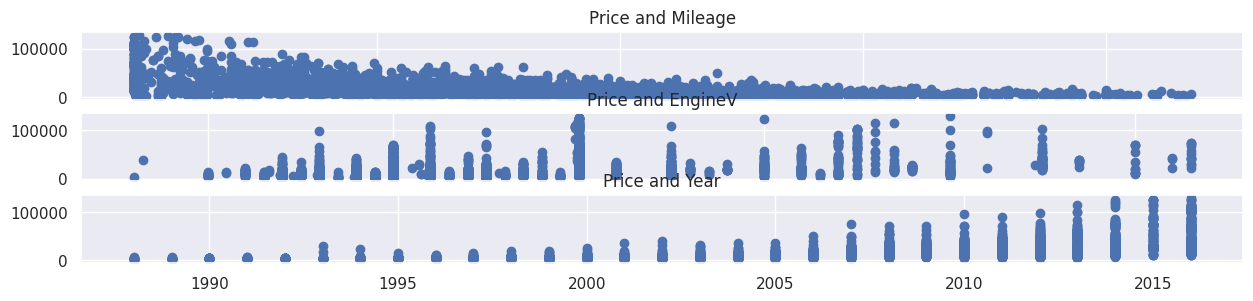

In [31]:
f, (Tahir, Aadil , Razzak) = plt.subplots( 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y


Tahir.scatter(cleaned_data['Mileage'],cleaned_data['Price'])
Tahir.set_title('Price and Mileage')

Aadil.scatter(cleaned_data['EngineV'],cleaned_data['Price'])
Aadil.set_title('Price and EngineV')

Razzak.scatter(cleaned_data['Year'],cleaned_data['Price'])
Razzak.set_title('Price and Year')


plt.show()

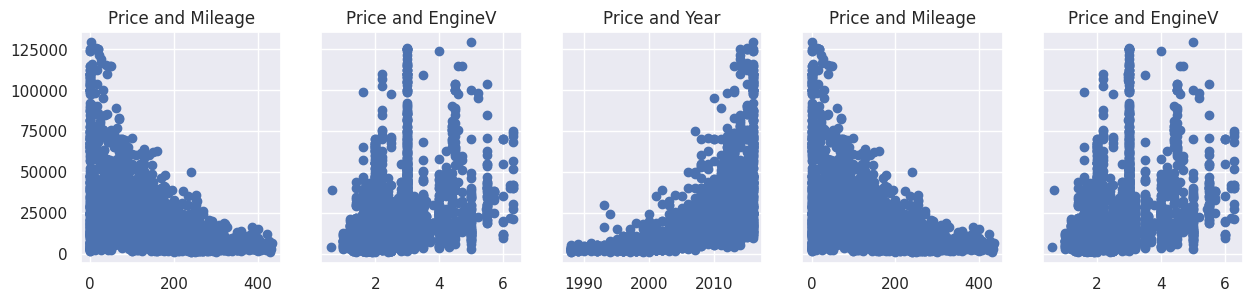

In [32]:
f, (Tahir, Aadil , Razzak , Numan , Gaffar) = plt.subplots(1, 5, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y


Tahir.scatter(cleaned_data['Mileage'],cleaned_data['Price'])
Tahir.set_title('Price and Mileage')

Aadil.scatter(cleaned_data['EngineV'],cleaned_data['Price'])
Aadil.set_title('Price and EngineV')

Razzak.scatter(cleaned_data['Year'],cleaned_data['Price'])
Razzak.set_title('Price and Year')

Numan.scatter(cleaned_data['Mileage'],cleaned_data['Price'])
Numan.set_title('Price and Mileage')

Gaffar.scatter(cleaned_data['EngineV'],cleaned_data['Price'])
Gaffar.set_title('Price and EngineV')


plt.show()

# 3) Log transformation


In [33]:
log_price = np.log(cleaned_data["Price"])    # Log of price variable
log_price

0        8.342840
1        8.974618
2        9.495519
3       10.043249
4        9.814656
          ...    
3862     9.350102
3863     9.792556
3864    11.736069
3865     8.779557
3866     9.510445
Name: Price, Length: 3867, dtype: float64

In [34]:
cleaned_data["Log_Price"] = log_price      # Add "Log_Price"
cleaned_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


In [35]:
cleaned_data = cleaned_data.drop(['Price'],axis=1)     # Drop "Price"
cleaned_data


,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


In [36]:
cleaned_data.columns.values      # We have sucessfully dropped "Price" and added "Log_Price"

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Log_Price'], dtype=object)

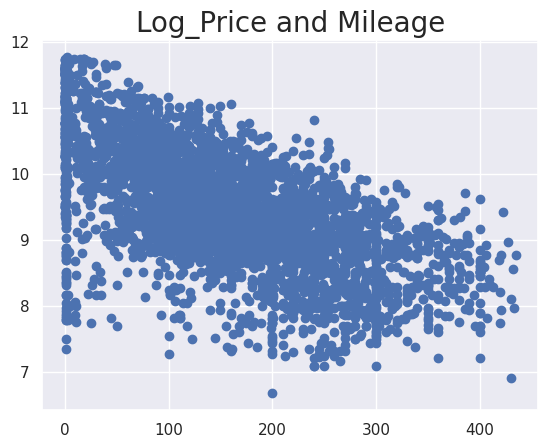

In [37]:
plt.scatter(cleaned_data["Mileage"],cleaned_data["Log_Price"])
plt.title("Log_Price and Mileage" , fontsize=20)
plt.show()

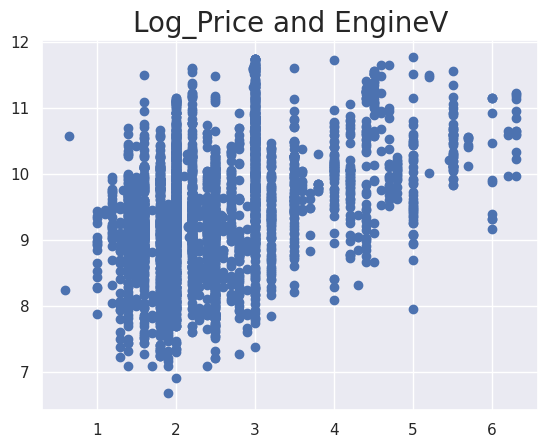

In [38]:
plt.scatter(cleaned_data["EngineV"],cleaned_data["Log_Price"])
plt.title("Log_Price and EngineV" , fontsize=20)
plt.show()

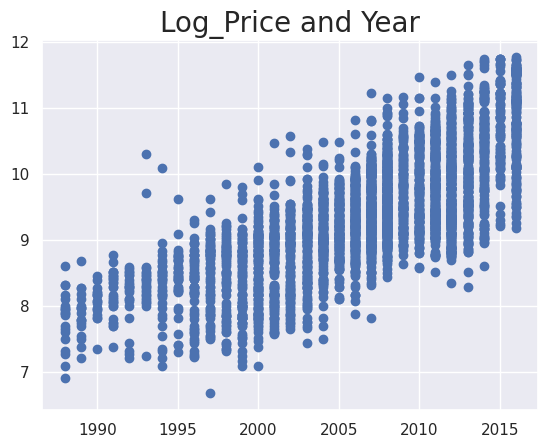

In [39]:
plt.scatter(cleaned_data["Year"],cleaned_data["Log_Price"])
plt.title("Log_Price and Year" , fontsize=20)
plt.show()

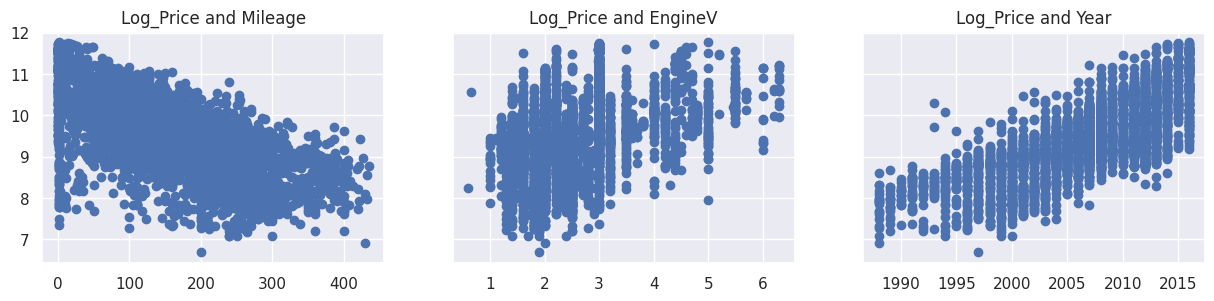

In [40]:

f, (Tahir, Aadil , Razzak) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y


Tahir.scatter(cleaned_data['Mileage'],cleaned_data['Log_Price'])
Tahir.set_title('Log_Price and Mileage')

Aadil.scatter(cleaned_data['EngineV'],cleaned_data['Log_Price'])
Aadil.set_title('Log_Price and EngineV')

Razzak.scatter(cleaned_data['Year'],cleaned_data['Log_Price'])
Razzak.set_title('Log_Price and Year')


plt.show()







# We obtain certain trends by doing this(Comparing with Log_Price)
# The relationships show a clear linear relationship
# This is some good linear regression material

# Alternatively we could have transformed each of the independent variables

# 4) Multicollinearity

In [41]:
# Importing variance_inflation_factor

# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones

independent_variable = cleaned_data[["Mileage","EngineV","Year"]]
independent_variable.head(2)

,Mileage,EngineV,Year
0,277,2.0,1991
1,427,2.9,1999


In [42]:
# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)

vif = pd.DataFrame()
vif["variance_inflation_factor"] = [variance_inflation_factor(independent_variable.values , i) for i in range(independent_variable.shape[1])]
vif["Features"] = independent_variable.columns.values

vif

,variance_inflation_factor,Features
0,3.791584,Mileage
1,7.662068,EngineV
2,10.354854,Year


In [43]:
# If collinearity is greater than 5, we will consider that as inappropriate
#  1) collinearity = 1   --- > best
#  1) collinearity = betweeen 1 and 5   --- > good
#  1) collinearity = above 5   --- > inappropriate for practise(multicollinearity)


# Year has high multicollinearity  , we will drop year
# This will lower down the VIF of other variables




Understand with this example

In [44]:
independent_variable_1 = cleaned_data[["Mileage","EngineV"]]
independent_variable_1.head(2)

,Mileage,EngineV
0,277,2.0
1,427,2.9


In [45]:

vif_1 = pd.DataFrame()
vif_1["variance_inflation_factor"] = [variance_inflation_factor(independent_variable_1.values , i) for i in range(independent_variable_1.shape[1])]
vif_1["Features"] = independent_variable_1.columns.values
vif_1


,variance_inflation_factor,Features
0,2.805214,Mileage
1,2.805214,EngineV


In [46]:
# Therefore we will drop year
data_with_no_multicollinearity = cleaned_data.drop("Year", axis=1)
data_with_no_multicollinearity.head(2)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log_Price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618


# 5) Create Dummy Variables

In [47]:
# Creating dummies
# Dummies deal with Categorical data
# No of dummies = 1 - No of variables
dummies_data_practise = pd.get_dummies(data_with_no_multicollinearity)
dummies_data_practise

,Mileage,EngineV,Log_Price,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,277,2.0,8.342840,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,427,2.9,8.974618,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,358,5.0,9.495519,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,240,4.2,10.043249,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,120,2.0,9.814656,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1
3863,35,1.6,9.792556,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
3864,9,3.0,11.736069,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3865,1,3.5,8.779557,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [48]:
# Drop 1st model of every variable
dummies_data = pd.get_dummies(data_with_no_multicollinearity , drop_first = True)
dummies_data

,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [49]:
dummies_data.columns.values

array(['Mileage', 'EngineV', 'Log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [50]:
# Interchanging variables
col = ['Log_Price',  'Mileage' , 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
col


['Log_Price',
 'Mileage',
 'EngineV',
 'Brand_BMW',
 'Brand_Mercedes-Benz',
 'Brand_Mitsubishi',
 'Brand_Renault',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Body_hatch',
 'Body_other',
 'Body_sedan',
 'Body_vagon',
 'Body_van',
 'Engine Type_Gas',
 'Engine Type_Other',
 'Engine Type_Petrol',
 'Registration_yes']

In [51]:
data_final_till_now = dummies_data[col]
data_final_till_now

,Log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


# 6) Linear regression model

### a) Declare the inputs and the targets

In [52]:
# Input = x = Independent variables
# Target = y = Dependent variables

target = data_final_till_now["Log_Price"]
input = data_final_till_now.drop("Log_Price" , axis = 1)

In [53]:
input.head(2)

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [54]:
target.head(2)

0    8.342840
1    8.974618
Name: Log_Price, dtype: float64

### b) Standard Scaling (Scale the data)

In [55]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

#scaler.fit(x)  . Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(input)

StandardScaler()

In [56]:
# Tranform .  Scale the features and store them in a new variable (the actual scaling procedure)
input_scaled_value = scaler.transform(input)
input_scaled_value

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

#

### c) Train test split

In [57]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# test_size = 0.2 ---> Divide train into 80% and test into 20%
# random_state ---> It will guarantee no shuffling
x_train,x_test,y_train,y_test = train_test_split(input_scaled_value,target, test_size = 0.2 , random_state = 365)




#

### d) Create regression

In [58]:
# Create a linear regression object
myRegression = LinearRegression()


# Fit the regression with the scaled TRAIN inputs and TRAIN targets
myRegression.fit(x_train,y_train)

LinearRegression()

### i) TRAINING

In [59]:
# Let's check the outputs of the regression
# I'll store them in y_predicted_hat_by_x as this is the 'theoretical' name of the predictionsy_predicted_hat


y_predicted_hat_by_x = myRegression.predict(x_train)
y_predicted_hat_by_x

array([8.85904429, 9.3574518 , 9.65596774, ..., 9.8871806 , 7.88940919,
       9.93899564])

In [60]:
y_train

1853     9.367344
3467     9.159047
1748     9.350102
2250     9.375855
129      9.539644
          ...    
428     11.074421
859     10.434116
801      9.928180
2740     7.824046
3666    10.488493
Name: Log_Price, Length: 3093, dtype: float64

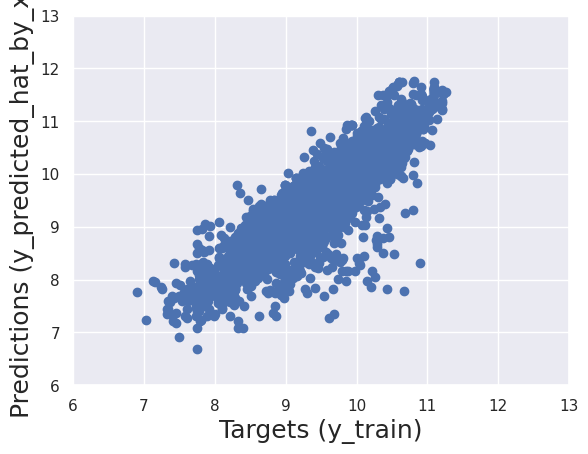

In [61]:
# The simplest way to compare the targets (y_train) and the predictions (y_predicted_hat_by_x) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction

plt.scatter(y_predicted_hat_by_x,y_train)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_predicted_hat_by_x)',size=18)


# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)       # Ad values are falling between 6 and 9
plt.ylim(6,13)
plt.show()




<ipython-input-62-0083c79345d7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_predicted_hat_by_x)


Text(0.5, 1.0, 'Residuals PDF')

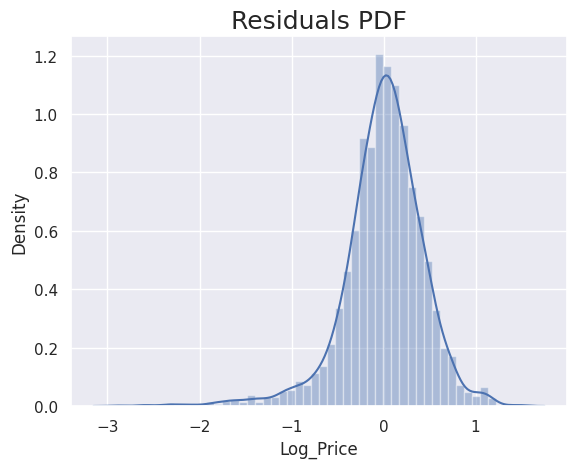

In [62]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies

sns.distplot(y_train - y_predicted_hat_by_x)
plt.title("Residuals PDF" , size = 18)




# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_predicted_hat_by_x), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [63]:
check_train = pd.DataFrame(np.exp(y_predicted_hat_by_x) , columns = ["Prediction"])
check_train["Target"] = np.exp(y_train)
check_train



,Prediction,Target
0,7037.753464,4200.0
1,11584.830434,NaN
2,15614.695114,13300.0
3,15874.379734,23000.0
4,14412.945086,18300.0
...,...,...
3088,53063.222822,4300.0
3089,29341.953293,82555.0
3090,19676.505704,10000.0
3091,2668.866668,56000.0


In [64]:
y_train = y_train.reset_index(drop = True)
y_train

0        9.367344
1        9.159047
2        9.350102
3        9.375855
4        9.539644
          ...    
3088    11.074421
3089    10.434116
3090     9.928180
3091     7.824046
3092    10.488493
Name: Log_Price, Length: 3093, dtype: float64

In [65]:
check_train["Target"] = np.exp(y_train)
check_train

,Prediction,Target
0,7037.753464,11700.0
1,11584.830434,9500.0
2,15614.695114,11500.0
3,15874.379734,11800.0
4,14412.945086,13900.0
...,...,...
3088,53063.222822,64500.0
3089,29341.953293,34000.0
3090,19676.505704,20500.0
3091,2668.866668,2500.0


In [66]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
check_train['Residual'] = check_train['Target'] - check_train['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

check_train

,Prediction,Target,Residual
0,7037.753464,11700.0,4662.246536
1,11584.830434,9500.0,-2084.830434
2,15614.695114,11500.0,-4114.695114
3,15874.379734,11800.0,-4074.379734
4,14412.945086,13900.0,-512.945086
...,...,...,...
3088,53063.222822,64500.0,11436.777178
3089,29341.953293,34000.0,4658.046707
3090,19676.505704,20500.0,823.494296
3091,2668.866668,2500.0,-168.866668


In [67]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
check_train['Difference%'] = np.absolute(check_train['Residual']/check_train['Target']*100)
check_train

,Prediction,Target,Residual,Difference%
0,7037.753464,11700.0,4662.246536,39.848261
1,11584.830434,9500.0,-2084.830434,21.945584
2,15614.695114,11500.0,-4114.695114,35.779958
3,15874.379734,11800.0,-4074.379734,34.528642
4,14412.945086,13900.0,-512.945086,3.690252
...,...,...,...,...
3088,53063.222822,64500.0,11436.777178,17.731437
3089,29341.953293,34000.0,4658.046707,13.700137
3090,19676.505704,20500.0,823.494296,4.017045
3091,2668.866668,2500.0,-168.866668,6.754667


In [68]:
check_train.describe()

,Prediction,Target,Residual,Difference%
count,3093.000000,3093.000000,3093.000000,3093.000000
mean,16256.015175,18201.622266,1945.607092,37.971355
std,12905.804389,18862.026420,10238.312588,76.458476
min,998.379198,800.000000,-49930.399574,0.004309
25%,7805.120776,7300.000000,-2117.108819,10.513692
50%,12106.506261,11700.000000,226.566126,23.137858
75%,20458.354646,21900.000000,3426.893184,39.933340
max,78224.384164,129222.000000,84866.601321,1694.173479


In [69]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
check_train.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
559,2500.11,2500.00,-0.11,0.00
62,16797.43,16800.00,2.57,0.02
2480,73885.02,73900.00,14.98,0.02
858,17904.94,17900.00,-4.94,0.03
1230,39980.44,39999.00,18.56,0.05
...,...,...,...,...
1644,16064.36,1550.00,-14514.36,936.41
185,27078.18,2600.00,-24478.18,941.47
2368,54030.40,4100.00,-49930.40,1217.81
9,33752.03,2500.00,-31252.03,1250.08


#

#  Useful information

In [70]:
# R square value    -->myRegression.score(x,y)

r2 = myRegression.score(x_train,y_train)
r2

0.744996578792662

In [71]:
# Adjusted r square for is used for more appropriate measure

def adj_r2(x_train,y_train):
    r2  = myRegression.score(x_train,y_train)
    n = x_train.shape[0]      # No of observation
    p = x_train.shape[1]      # No of variable
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

adj_r2(x_train,y_train)

0.7435868037811093

#

### e) Finding the weights and bias

In [72]:
# weights = coefficient
myRegression.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [73]:
# bias = intercept
myRegression.intercept_

9.415239458021299

In [74]:
# creating a summary

regression_summary = pd.DataFrame(input.columns.values, columns=['Features'])
regression_summary["Weights"] = myRegression.coef_

regression_summary

,Features,Weights
0,Mileage,-0.45
1,EngineV,0.21
2,Brand_BMW,0.01
3,Brand_Mercedes-Benz,0.01
4,Brand_Mitsubishi,-0.14
5,Brand_Renault,-0.18
6,Brand_Toyota,-0.06
7,Brand_Volkswagen,-0.09
8,Body_hatch,-0.15
9,Body_other,-0.10


In [75]:
# Check the different categories in the 'Brand' variable
cleaned_data["Brand"].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [76]:
cleaned_data["Body"].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [77]:
cleaned_data["Mileage"].unique()

array([277, 427, 358, 240, 120, 200, 193, 212, 177, 260, 165, 100, 250,
        84, 203,  21,   0, 132, 225, 130, 163, 151, 330, 171,  65,   1,
        72,  87, 160, 147, 300,  14, 230,  86, 326,  30, 181,  80, 231,
       134, 335,  66, 172, 317, 266, 265, 162,  81, 253, 270, 245, 127,
       152, 267, 178, 190, 175, 105, 195, 126, 420, 180,  51, 287, 222,
       214,  83, 210,  89, 333, 116, 405, 131, 138,  50, 207,  31, 334,
        18, 150,  76, 295,   5, 119, 139, 235,  33, 156, 155,  63, 208,
       103,  57,  64, 137,  82, 153, 125,  60, 257, 197, 164, 205, 145,
       110, 226, 184,  16, 118, 256, 168,  97, 140, 280,  93, 176, 170,
        95,  27, 290, 112, 187, 234, 182, 237,  90,  73, 174, 144,  78,
       201, 390, 350, 148, 189, 296, 179,  99,  91, 216, 102,  38, 115,
        41,  11,  48, 220,  20, 273, 106,  85,  71, 117, 368,   2,  68,
       157, 285,  22,  98, 133, 167, 360, 258,   3, 286, 320, 113,  70,
       198, 108,  12, 173, 142,  47, 186, 185, 246, 263,  54, 13

#

### ii) TESTING

In [78]:
y_predicted_hat_by_x_test = myRegression.predict(x_test)
y_predicted_hat_by_x_test

array([ 9.27664312,  8.16030544,  8.92973788,  8.91784179,  9.33728047,
        9.96598334,  9.9114155 ,  9.9208174 ,  9.35716755, 10.42271629,
        8.88752402,  8.55174331,  8.60959284,  9.49497114,  9.01780685,
        9.27066723, 10.07414053,  9.37336324, 10.53476323,  9.69141643,
        9.38234396, 10.35957622,  8.71643055,  9.48127657, 10.07112477,
       10.72044951,  7.68659457,  7.84581633, 10.49103837, 10.1682424 ,
        9.65242235,  9.46172765,  9.43026705, 10.04071585,  9.89620074,
        9.33587239,  9.25909284, 10.18407499,  9.20222613,  9.72462687,
        9.83481651,  9.89572534, 10.05561933,  9.98099629,  8.88752402,
        9.04923537,  8.17265027, 10.18207097, 11.25678153,  8.51181367,
        7.8157843 ,  7.84132356,  9.27957204,  9.92592817,  9.82959497,
        9.44735305,  9.64082592,  9.9961603 , 10.472667  ,  9.0113213 ,
        9.43101748,  8.90881239,  9.29181481,  8.58519974,  9.17074707,
        9.89582068,  8.1066477 ,  8.9386957 ,  8.81242218,  7.80

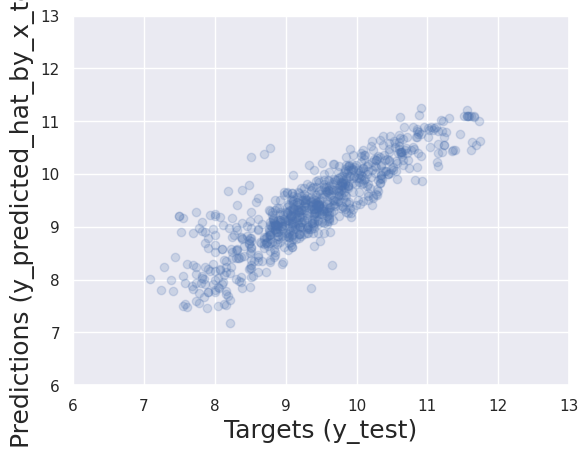

In [79]:
plt.scatter(y_test,y_predicted_hat_by_x_test , alpha = 0.2)    # alpha is for brightness

plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_predicted_hat_by_x_test)',size=18)

plt.xlim(6,13)       # Ad values are falling between 6 and 9
plt.ylim(6,13)
plt.show()



<ipython-input-80-975b53f40a1a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_predicted_hat_by_x_test)


Text(0.5, 1.0, 'Residuals PDF')

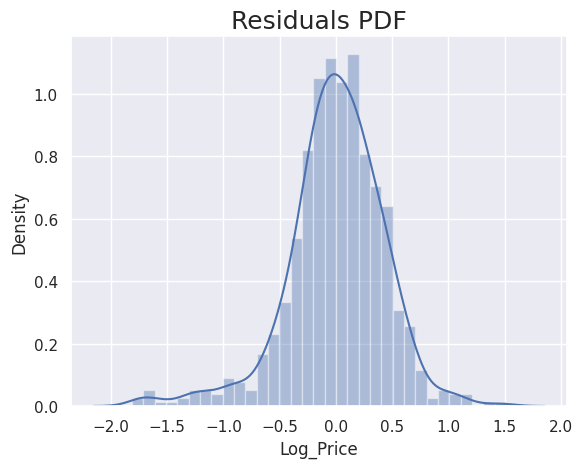

In [80]:
sns.distplot(y_test - y_predicted_hat_by_x_test)
plt.title("Residuals PDF" , size = 18)

In [81]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price

check_test = pd.DataFrame(np.exp(y_predicted_hat_by_x_test) , columns = ["Prediction"])      # Exponential of log price = price
check_test

,Prediction
0,10685.50
1,3499.26
2,7553.29
3,7463.96
4,11353.49
5,21289.80
6,20159.19
7,20349.62
8,11581.54
9,33614.62


In [82]:
check_test["Target"] = np.exp(y_test)
check_test

,Prediction,Target
0,10685.50,NaN
1,3499.26,7900.00
2,7553.29,NaN
3,7463.96,NaN
4,11353.49,NaN
5,21289.80,14200.00
6,20159.19,NaN
7,20349.62,NaN
8,11581.54,11950.00
9,33614.62,NaN


In [83]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing

y_test = y_test.reset_index(drop=True)
y_test.head()

0   7.74
1   7.94
2   7.82
3   8.76
4   9.12
Name: Log_Price, dtype: float64

In [84]:
check_test["Target"] = np.exp(y_test)
check_test

,Prediction,Target
0,10685.50,2300.00
1,3499.26,2800.00
2,7553.29,2500.00
3,7463.96,6400.00
4,11353.49,9150.00
5,21289.80,20000.00
6,20159.19,38888.00
7,20349.62,16999.00
8,11581.54,12500.00
9,33614.62,41000.00


In [85]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
check_test['Residual'] = check_test['Target'] - check_test['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

check_test

,Prediction,Target,Residual
0,10685.50,2300.00,-8385.50
1,3499.26,2800.00,-699.26
2,7553.29,2500.00,-5053.29
3,7463.96,6400.00,-1063.96
4,11353.49,9150.00,-2203.49
5,21289.80,20000.00,-1289.80
6,20159.19,38888.00,18728.81
7,20349.62,16999.00,-3350.62
8,11581.54,12500.00,918.46
9,33614.62,41000.00,7385.38


In [86]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
check_test['Difference%'] = np.absolute(check_test['Residual']/check_test['Target']*100)
check_test

,Prediction,Target,Residual,Difference%
0,10685.50,2300.00,-8385.50,364.59
1,3499.26,2800.00,-699.26,24.97
2,7553.29,2500.00,-5053.29,202.13
3,7463.96,6400.00,-1063.96,16.62
4,11353.49,9150.00,-2203.49,24.08
5,21289.80,20000.00,-1289.80,6.45
6,20159.19,38888.00,18728.81,48.16
7,20349.62,16999.00,-3350.62,19.71
8,11581.54,12500.00,918.46,7.35
9,33614.62,41000.00,7385.38,18.01


In [87]:
check_test.describe()

,Prediction,Target,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,15946.76,18165.82,2219.06,36.26
std,13133.20,19967.86,10871.22,55.07
min,1320.56,1200.00,-29456.50,0.06
25%,7413.64,6900.00,-2044.19,12.11
50%,11568.17,11600.00,142.52,23.47
75%,20162.41,20500.00,3147.34,39.56
max,77403.06,126000.00,85106.16,512.69


In [88]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
check_test.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74
